In [1]:
import warnings 
import numpy as np # type: ignore
import pandas as pd # type: ignore
import xgboost as xgb # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import LabelEncoder   # type: ignore
from sklearn.metrics import mean_squared_error   # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
label_encoder = LabelEncoder()

In [2]:
data = pd.read_csv("/home/shekar/AIML_shekar/Himalaya_data/DF/combined_data_weekly_wise.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

CFACode  ProductCode week_start_date  start_date    end_date    Qty  \
0     7001      7000013      2021-12-27  2022-01-01  2022-01-01   20.0   
1     7001      7000018      2021-12-27  2022-01-01  2022-01-01    0.0   
2     7001      7000022      2021-12-27  2022-01-01  2022-01-01  240.0   
3     7001      7000026      2021-12-27  2022-01-01  2022-01-01  250.0   
4     7001      7000029      2021-12-27  2022-01-01  2022-01-01  324.0   

   Qty_min  Qty_max    Qty_mean  Qty_range    Qty_std  Qty_skew    RATE  \
0      4.0      8.0    5.000000        4.0   2.000000  2.000000  583.41   
1      0.0      0.0    0.000000        0.0   0.000000       NaN  414.03   
2     48.0     96.0   60.000000       48.0  24.000000  2.000000  112.91   
3     50.0    150.0   83.333333      100.0  57.735027  1.732051   60.22   
4    144.0    180.0  162.000000       36.0  25.455844       NaN   71.51   

   RATE_min  RATE_max    MRP    Amount  ISDELETED  PREVQUANTITY  \
0    583.41    583.41  775.0  11668.20      False          20.0   
1    414.03    414.03  550.0      0.00      False           0.0   
2    112.91    112.91  150.0  27098.40      False         240.0   
3     60.22     60.22   80.0  15055.00      False         250.0   
4     71.51     71.51   95.0  23169.24      False         324.0   

   DiscountAmount  Product_IsActive      Product_CreatedDate StockDate_min  \
0             0.0              True  2021-03-15 22:01:48.577    1970-01-01   
1             0.0              True  2021-03-15 22:01:48.577    1970-01-01   
2             0.0              True  2021-03-15 22:01:48.577    1970-01-01   
3             0.0              True  2021-03-15 22:01:48.577    1970-01-01   
4             0.0              True  2021-03-15 22:01:48.577    1970-01-01   

  StockDate_max        DATE SubGroup                         Product_Name  \
0    1970-01-01  2022-01-01   ['ST']      BABY CARE GIFT BASKET PACK 1KIT   
1    1970-01-01  2022-01-01   ['ST']  BABY CARE GIFT PACK 7's WITH WINDOW   
2    1970-01-01  2022-01-01   ['ST']                     BABY CREAM 100ml   
3    1970-01-01  2022-01-01   ['ST']                      BABY CREAM 50ml   
4    1970-01-01  2022-01-01   ['ST']                    BABY LOTION 100ml   

   Category  ProdGroup  PackType  ConsumedStock  CofirmedStock  ReservedStock  \
0     120.0      567.0       1.0            0.0            0.0            0.0   
1     120.0      567.0       1.0            0.0            0.0            0.0   
2     120.0      173.0       1.0            0.0            0.0            0.0   
3     120.0      173.0       1.0            0.0            0.0            0.0   
4     120.0      178.0       1.0            0.0            0.0            0.0   

   AddedStock  PresentStock  PreviousStock  CofirmedStock_last  \
0         0.0           0.0            0.0                 0.0   
1         0.0           0.0            0.0                 0.0   
2         0.0           0.0            0.0                 0.0   
3         0.0           0.0            0.0                 0.0   
4         0.0           0.0            0.0                 0.0   

   ReservedStock_last  AddedStock_last  PresentStock_last  PreviousStock_last  \
0                 0.0              0.0                0.0                 0.0   
1                 0.0              0.0                0.0                 0.0   
2                 0.0              0.0                0.0                 0.0   
3                 0.0              0.0                0.0                 0.0   
4                 0.0              0.0                0.0                 0.0   

  CITY CFA_Address CFANAME  CFAPINCODE  STATECODE  CFA_ISACTIVE  
0    0           0       0         0.0        0.0           0.0  
1    0           0       0         0.0        0.0           0.0  
2    0           0       0         0.0        0.0           0.0  
3    0           0       0         0.0        0.0           0.0  
4    0           0       0         0.0        0.0           0.0

In [3]:
data['Qty_std'] = data['Qty_std'].ffill()
data['Qty_skew'] = data['Qty_skew'].ffill()

data.dropna(inplace=True)
data.drop(['start_date', 'end_date', 'Product_CreatedDate','StockDate_min', 'StockDate_max', 'DATE', 'Product_Name', 'SubGroup',  'PREVQUANTITY',
           'Amount', 'Product_IsActive', 'ISDELETED', 'ReservedStock', 'PreviousStock', 'CITY', 'CofirmedStock_last', 'ReservedStock_last', 'PreviousStock_last',
           'CFA_ISACTIVE', 'CFA_Address', 'CFANAME', 'CFAPINCODE', 'STATECODE', 'AddedStock_last', 'PresentStock_last', 'CofirmedStock' , 'DiscountAmount'], axis=1, inplace=True)

In [4]:
data.head()

CFACode  ProductCode week_start_date    Qty  Qty_min  Qty_max    Qty_mean  \
0     7001      7000013      2021-12-27   20.0      4.0      8.0    5.000000   
1     7001      7000018      2021-12-27    0.0      0.0      0.0    0.000000   
2     7001      7000022      2021-12-27  240.0     48.0     96.0   60.000000   
3     7001      7000026      2021-12-27  250.0     50.0    150.0   83.333333   
4     7001      7000029      2021-12-27  324.0    144.0    180.0  162.000000   

   Qty_range    Qty_std  Qty_skew    RATE  RATE_min  RATE_max    MRP  \
0        4.0   2.000000  2.000000  583.41    583.41    583.41  775.0   
1        0.0   0.000000  2.000000  414.03    414.03    414.03  550.0   
2       48.0  24.000000  2.000000  112.91    112.91    112.91  150.0   
3      100.0  57.735027  1.732051   60.22     60.22     60.22   80.0   
4       36.0  25.455844  1.732051   71.51     71.51     71.51   95.0   

   Category  ProdGroup  PackType  ConsumedStock  AddedStock  PresentStock  
0     120.0      567.0       1.0            0.0         0.0           0.0  
1     120.0      567.0       1.0            0.0         0.0           0.0  
2     120.0      173.0       1.0            0.0         0.0           0.0  
3     120.0      173.0       1.0            0.0         0.0           0.0  
4     120.0      178.0       1.0            0.0         0.0           0.0

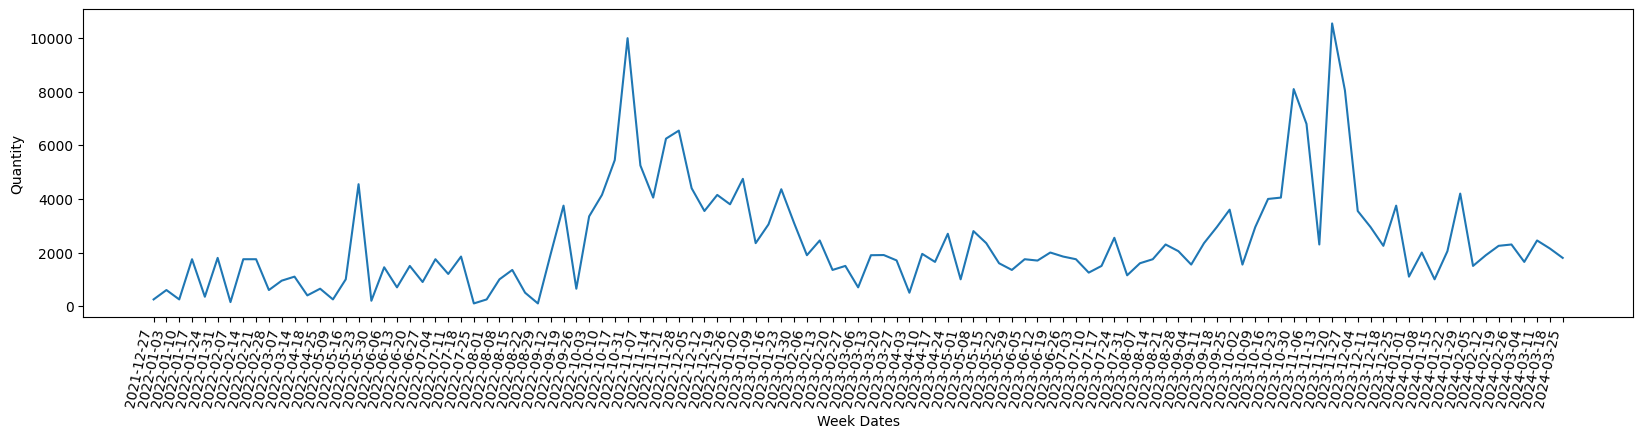

In [5]:
product_data = data[(data['CFACode'] == 7001) & (data['ProductCode'] == 7000026)]
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot(product_data['week_start_date'], product_data['Qty'])
plt.xlabel('Week Dates')
plt.ylabel('Quantity')
plt.xticks(rotation=78, ha = 'right')
plt.show()

In [6]:
data['week_start_date'] = pd.to_datetime(data['week_start_date'], format='%Y-%m-%d', errors = 'coerce')
data.head()

CFACode  ProductCode week_start_date    Qty  Qty_min  Qty_max    Qty_mean  \
0     7001      7000013      2021-12-27   20.0      4.0      8.0    5.000000   
1     7001      7000018      2021-12-27    0.0      0.0      0.0    0.000000   
2     7001      7000022      2021-12-27  240.0     48.0     96.0   60.000000   
3     7001      7000026      2021-12-27  250.0     50.0    150.0   83.333333   
4     7001      7000029      2021-12-27  324.0    144.0    180.0  162.000000   

   Qty_range    Qty_std  Qty_skew    RATE  RATE_min  RATE_max    MRP  \
0        4.0   2.000000  2.000000  583.41    583.41    583.41  775.0   
1        0.0   0.000000  2.000000  414.03    414.03    414.03  550.0   
2       48.0  24.000000  2.000000  112.91    112.91    112.91  150.0   
3      100.0  57.735027  1.732051   60.22     60.22     60.22   80.0   
4       36.0  25.455844  1.732051   71.51     71.51     71.51   95.0   

   Category  ProdGroup  PackType  ConsumedStock  AddedStock  PresentStock  
0     120.0      567.0       1.0            0.0         0.0           0.0  
1     120.0      567.0       1.0            0.0         0.0           0.0  
2     120.0      173.0       1.0            0.0         0.0           0.0  
3     120.0      173.0       1.0            0.0         0.0           0.0  
4     120.0      178.0       1.0            0.0         0.0           0.0

In [7]:
data = data[['week_start_date', 'CFACode', 'ProductCode', 'Qty', 'MRP', 'RATE']]

In [8]:
data.head()

week_start_date  CFACode  ProductCode    Qty    MRP    RATE
0      2021-12-27     7001      7000013   20.0  775.0  583.41
1      2021-12-27     7001      7000018    0.0  550.0  414.03
2      2021-12-27     7001      7000022  240.0  150.0  112.91
3      2021-12-27     7001      7000026  250.0   80.0   60.22
4      2021-12-27     7001      7000029  324.0   95.0   71.51

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31      309.137502
1 2024-04-07      170.586681
2 2024-04-14      109.096619
3 2024-04-21      140.572739
4 2024-04-28      107.296416
5 2024-05-05       65.023149
6 2024-05-12       93.598365
7 2024-05-19       77.468744
8 2024-05-26       87.561279
9 2024-06-02      118.970072


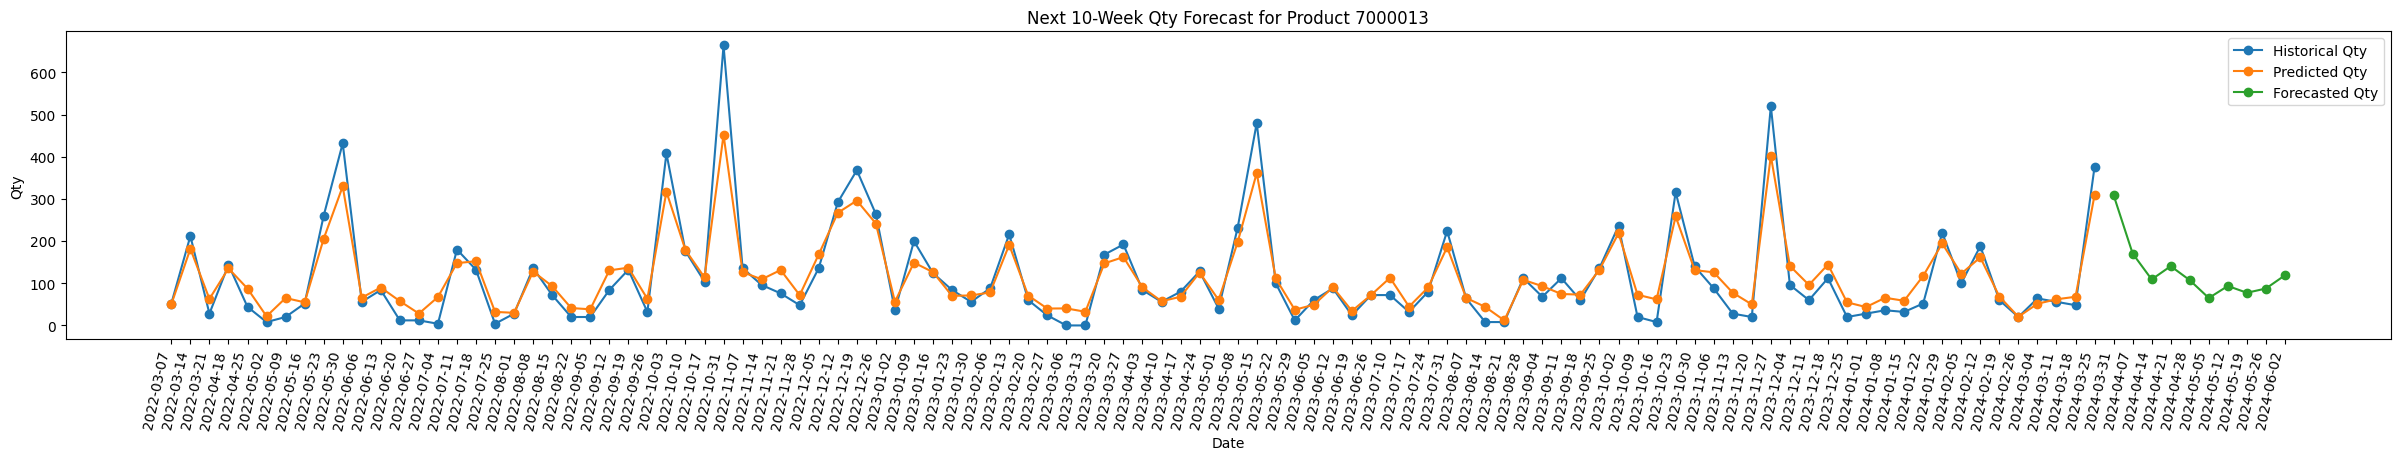

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31      617.702436
1 2024-04-07      172.358942
2 2024-04-14      322.982869
3 2024-04-21      223.195236
4 2024-04-28      241.082904
5 2024-05-05      220.242909
6 2024-05-12      335.559495
7 2024-05-19      369.068088
8 2024-05-26      248.315232
9 2024-06-02      178.574523


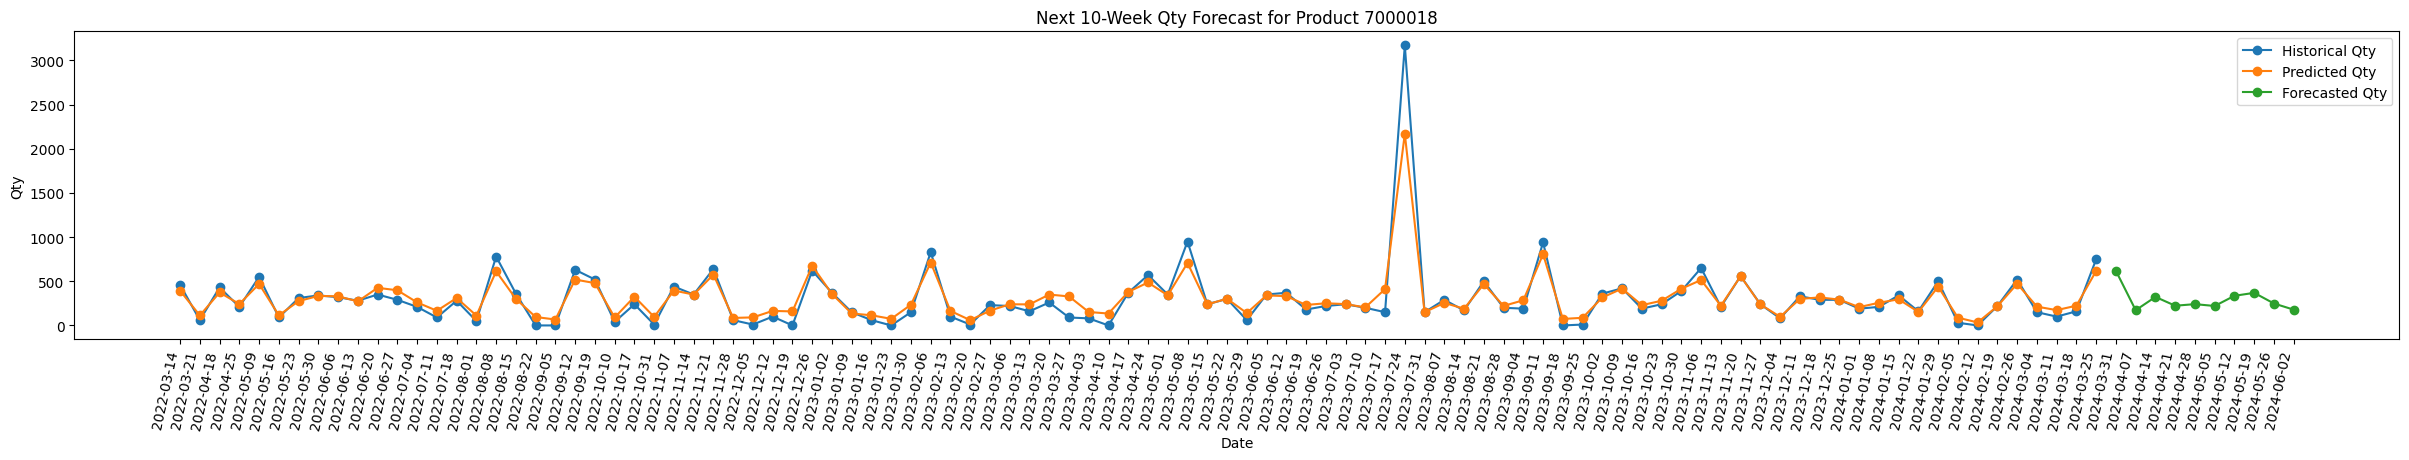

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     1750.318184
1 2024-04-07      757.263416
2 2024-04-14      957.615696
3 2024-04-21     1089.664546
4 2024-04-28     1257.513127
5 2024-05-05     1150.163149
6 2024-05-12     1092.071888
7 2024-05-19     1220.622786
8 2024-05-26     1774.176026
9 2024-06-02     1774.308992


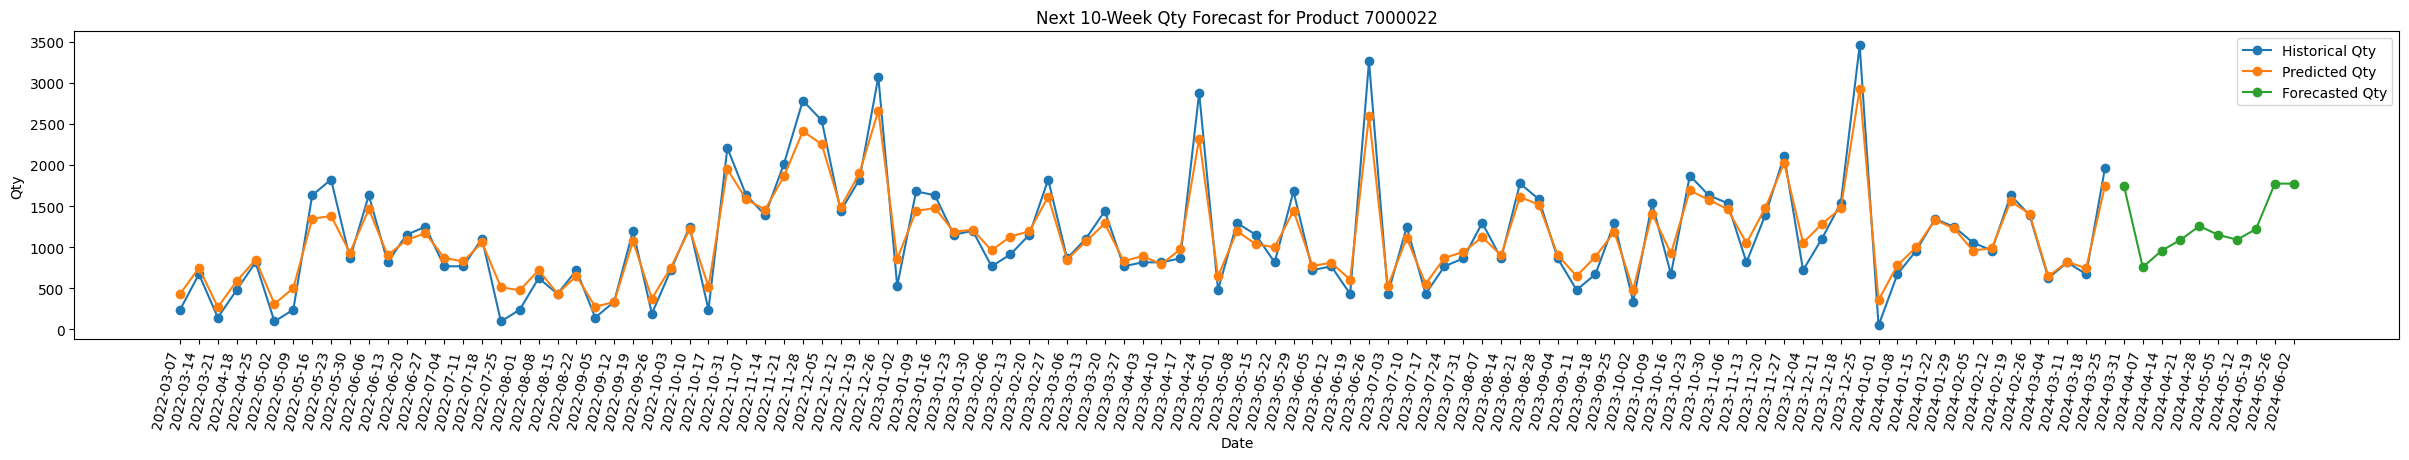

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     3134.051829
1 2024-04-07     1442.850889
2 2024-04-14     2257.763565
3 2024-04-21     1970.485004
4 2024-04-28     1798.607796
5 2024-05-05     1801.809127
6 2024-05-12     2164.744135
7 2024-05-19     1838.348801
8 2024-05-26     2512.033609
9 2024-06-02     2131.068858


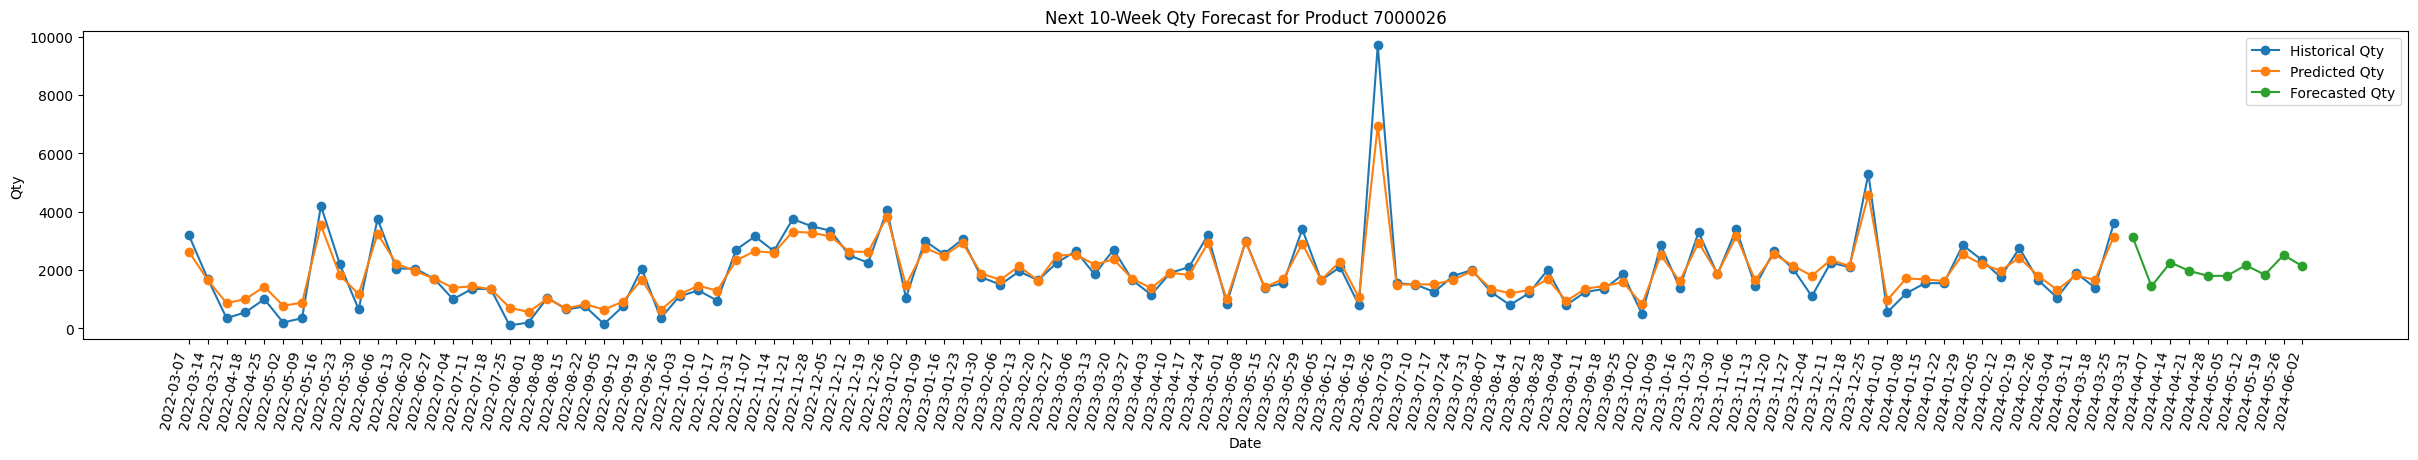

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     4068.758463
1 2024-04-07     2652.749470
2 2024-04-14     2795.938164
3 2024-04-21     2243.134466
4 2024-04-28     2931.892298
5 2024-05-05     3043.376927
6 2024-05-12     2535.279865
7 2024-05-19     3373.642353
8 2024-05-26     3102.465338
9 2024-06-02     3613.119672


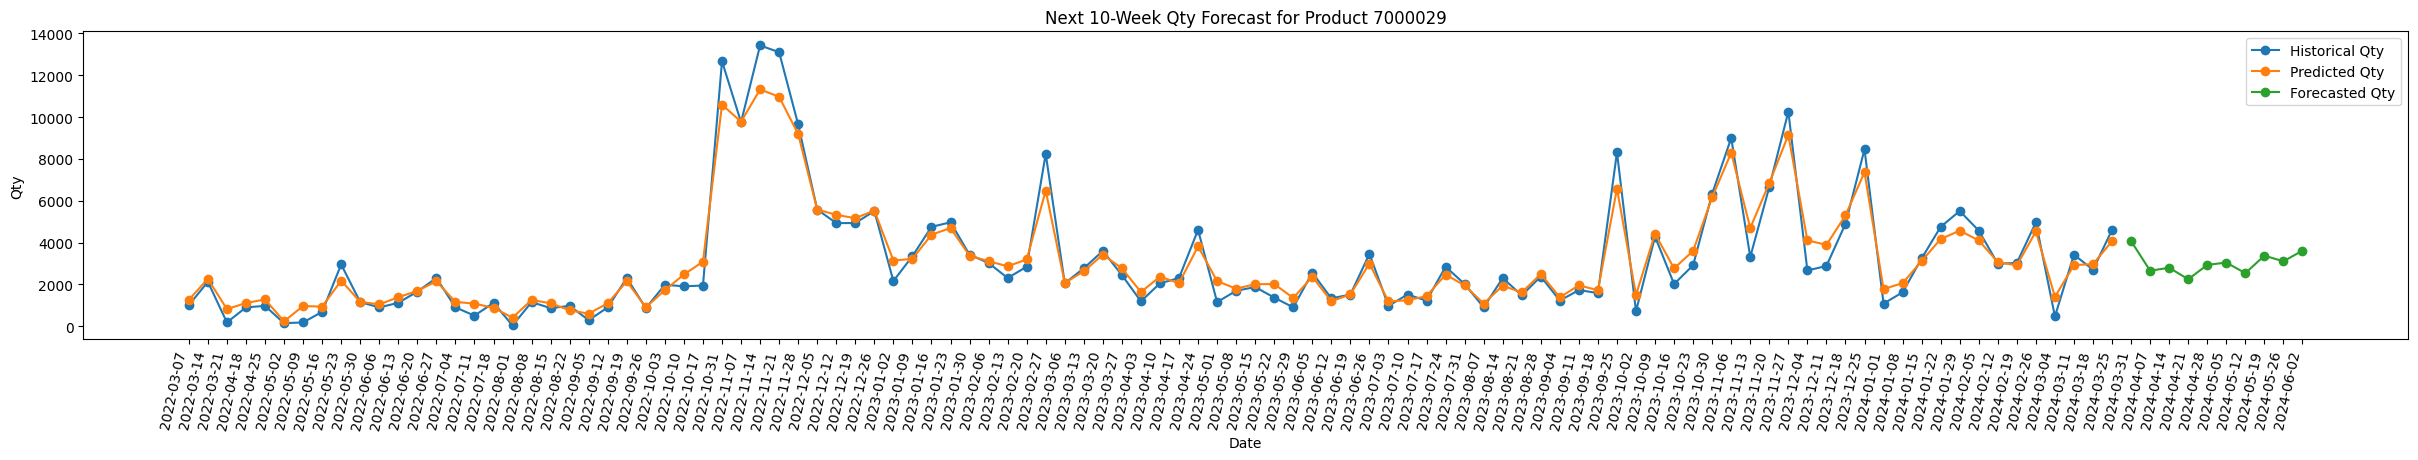

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31      982.740595
1 2024-04-07      657.591506
2 2024-04-14      606.039949
3 2024-04-21      834.038774
4 2024-04-28      713.859240
5 2024-05-05      718.488965
6 2024-05-12      407.530564
7 2024-05-19      380.115105
8 2024-05-26      417.287894
9 2024-06-02      407.014019


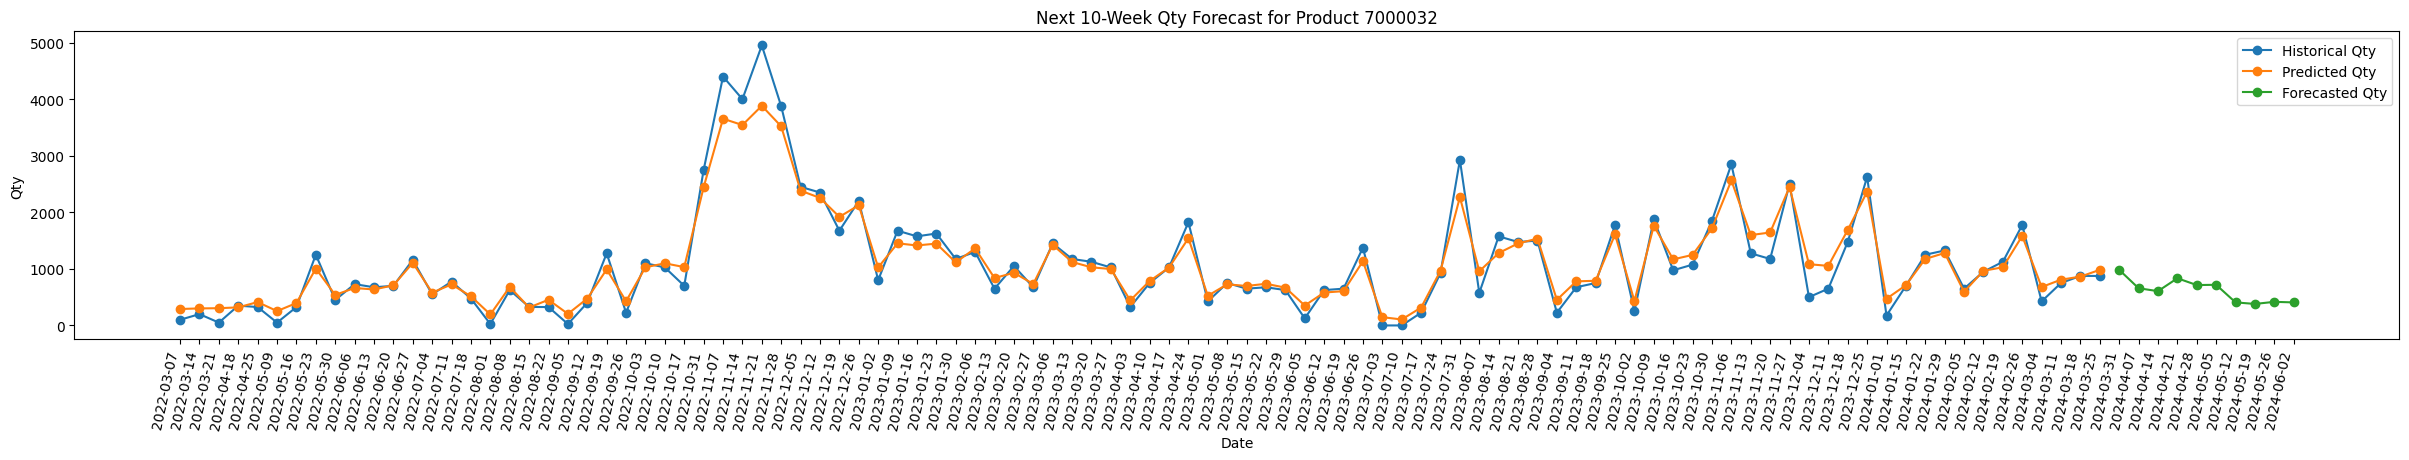

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31      572.192343
1 2024-04-07      203.922129
2 2024-04-14      200.881305
3 2024-04-21      205.713712
4 2024-04-28      273.468944
5 2024-05-05      328.124932
6 2024-05-12      382.985902
7 2024-05-19      222.582614
8 2024-05-26      231.047084
9 2024-06-02      278.265951


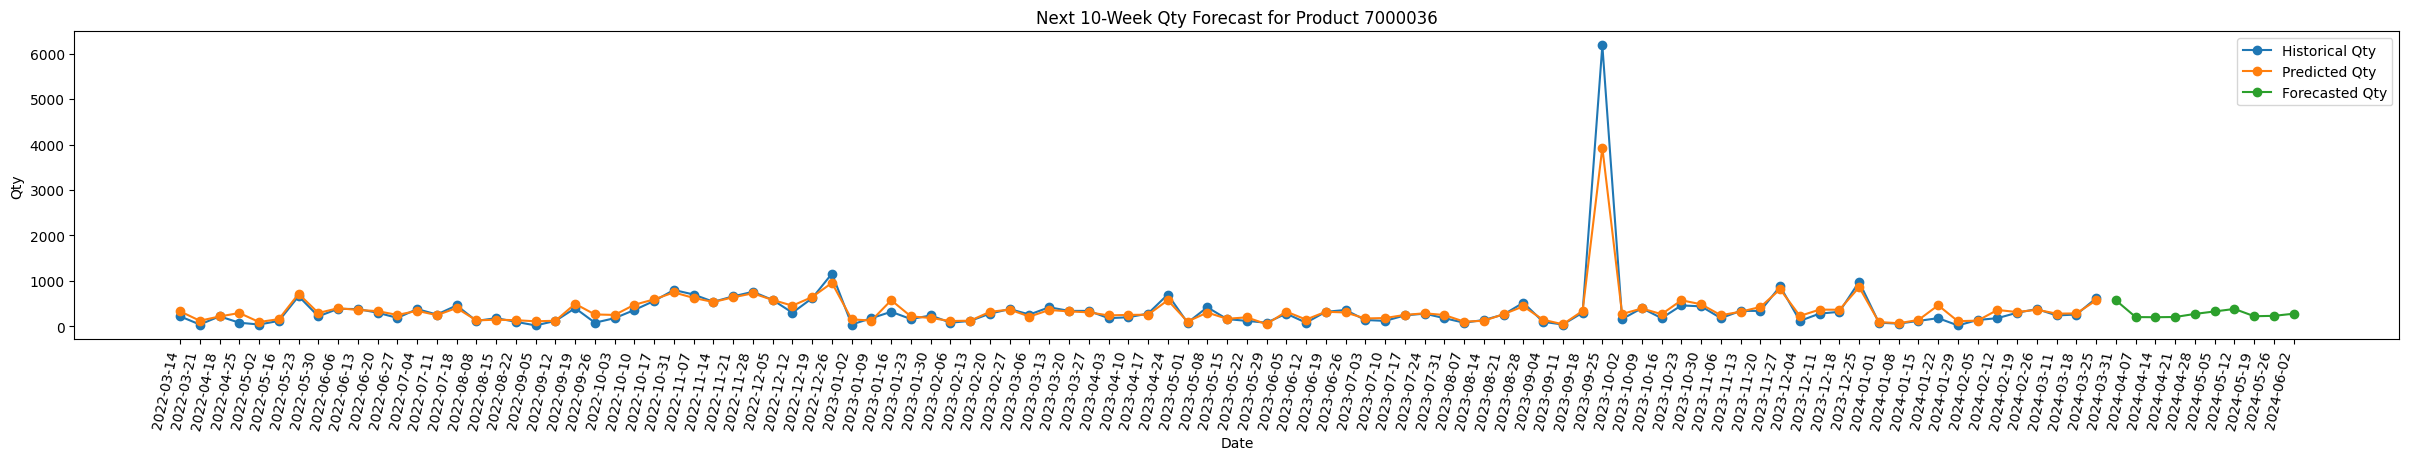

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31    16780.926140
1 2024-04-07     9997.778913
2 2024-04-14    11288.375947
3 2024-04-21    12912.418140
4 2024-04-28    14645.469492
5 2024-05-05    12342.889091
6 2024-05-12    17956.439407
7 2024-05-19    11773.381220
8 2024-05-26    11319.080059
9 2024-06-02    12033.311947


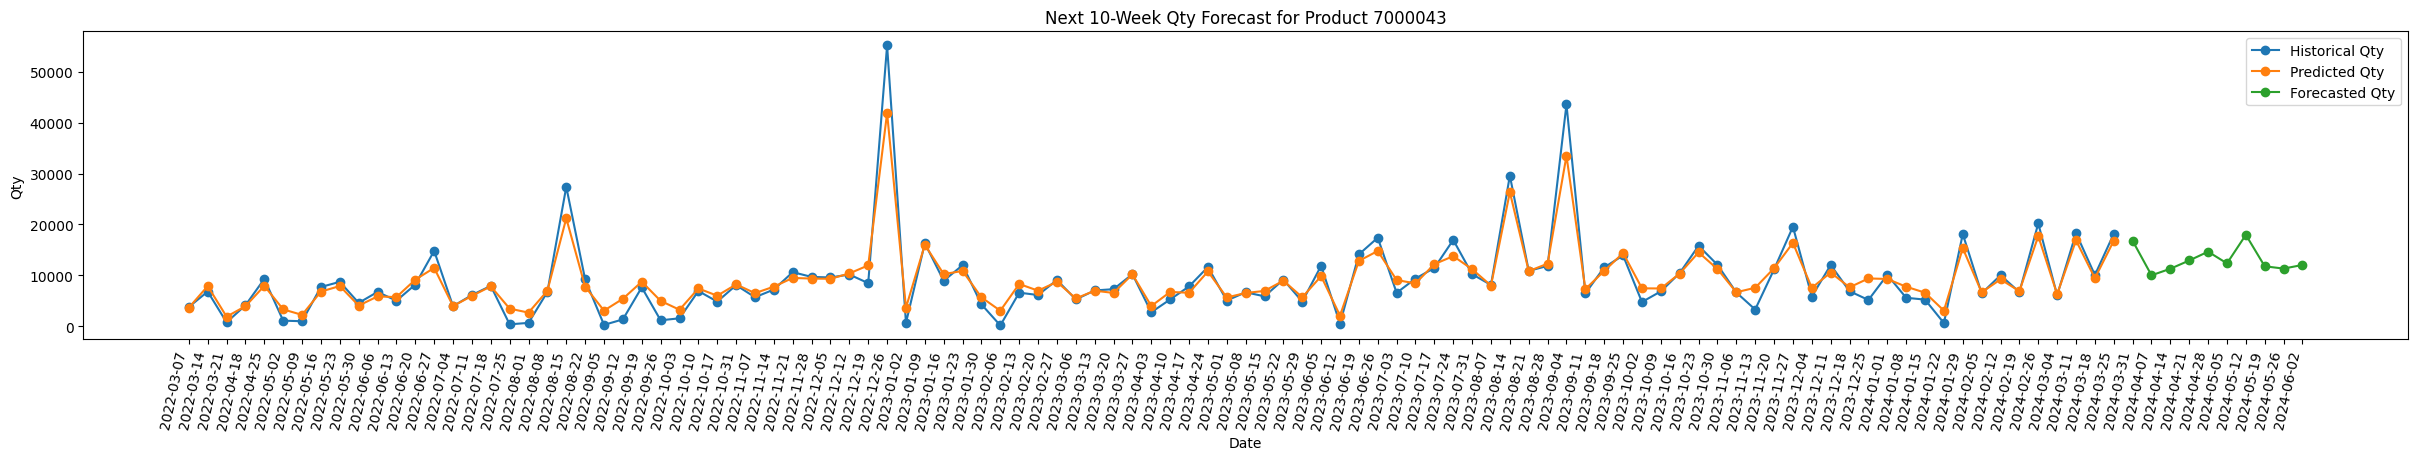

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     3213.873856
1 2024-04-07     1418.965442
2 2024-04-14     4307.478476
3 2024-04-21     2521.532145
4 2024-04-28     3090.618466
5 2024-05-05     2961.294704
6 2024-05-12     2882.046307
7 2024-05-19     3394.341954
8 2024-05-26     4150.634235
9 2024-06-02     3317.787787


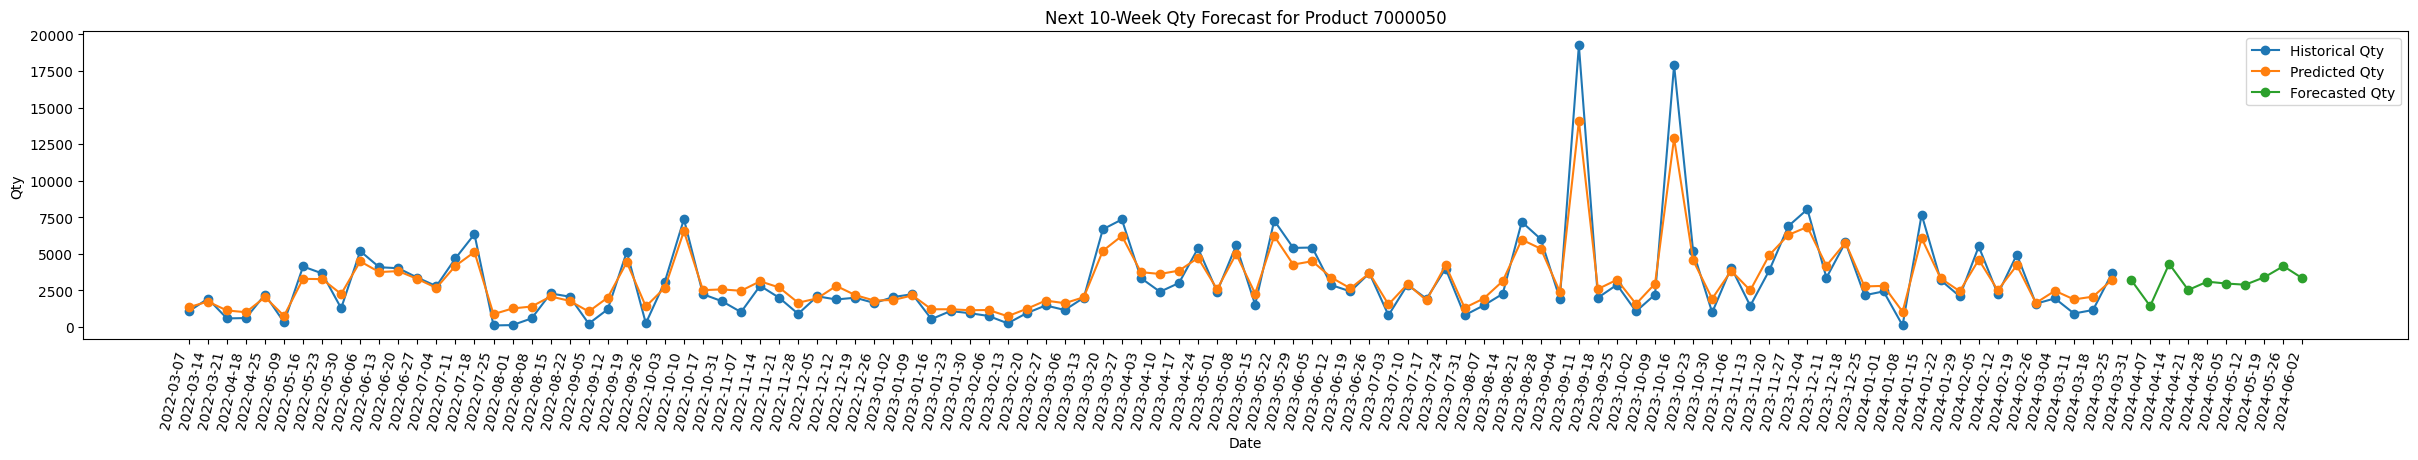

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     9807.337847
1 2024-04-07     8598.920190
2 2024-04-14    10417.636890
3 2024-04-21     9867.066590
4 2024-04-28     8063.157444
5 2024-05-05     9435.751016
6 2024-05-12    12305.144516
7 2024-05-19    12796.471824
8 2024-05-26    10539.988211
9 2024-06-02    12395.214838


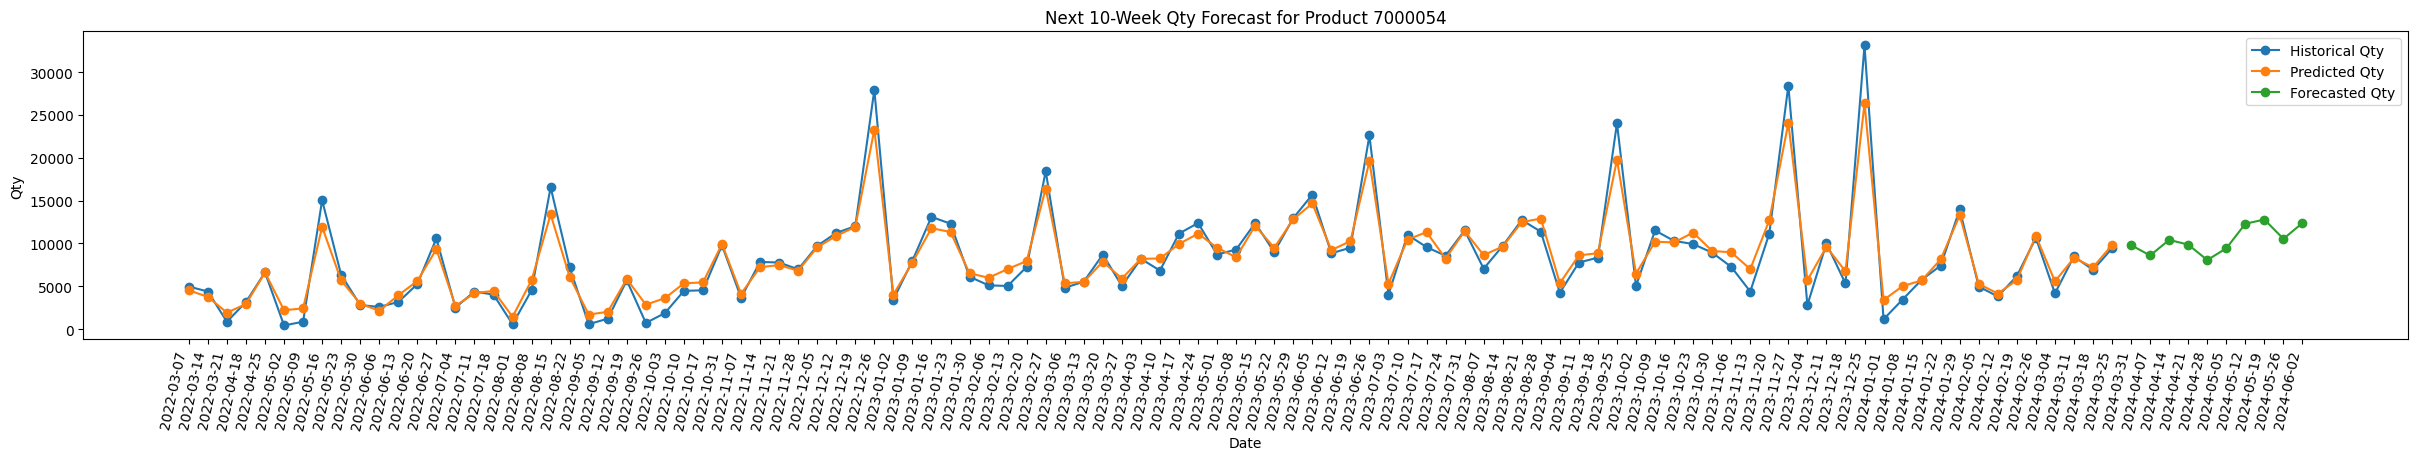

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     1096.009735
1 2024-04-07     1095.940298
2 2024-04-14     1480.487109
3 2024-04-21     1509.249302
4 2024-04-28     1278.577092
5 2024-05-05     1355.792100
6 2024-05-12     1172.159894
7 2024-05-19     1361.814597
8 2024-05-26     1680.082769
9 2024-06-02     1494.655354


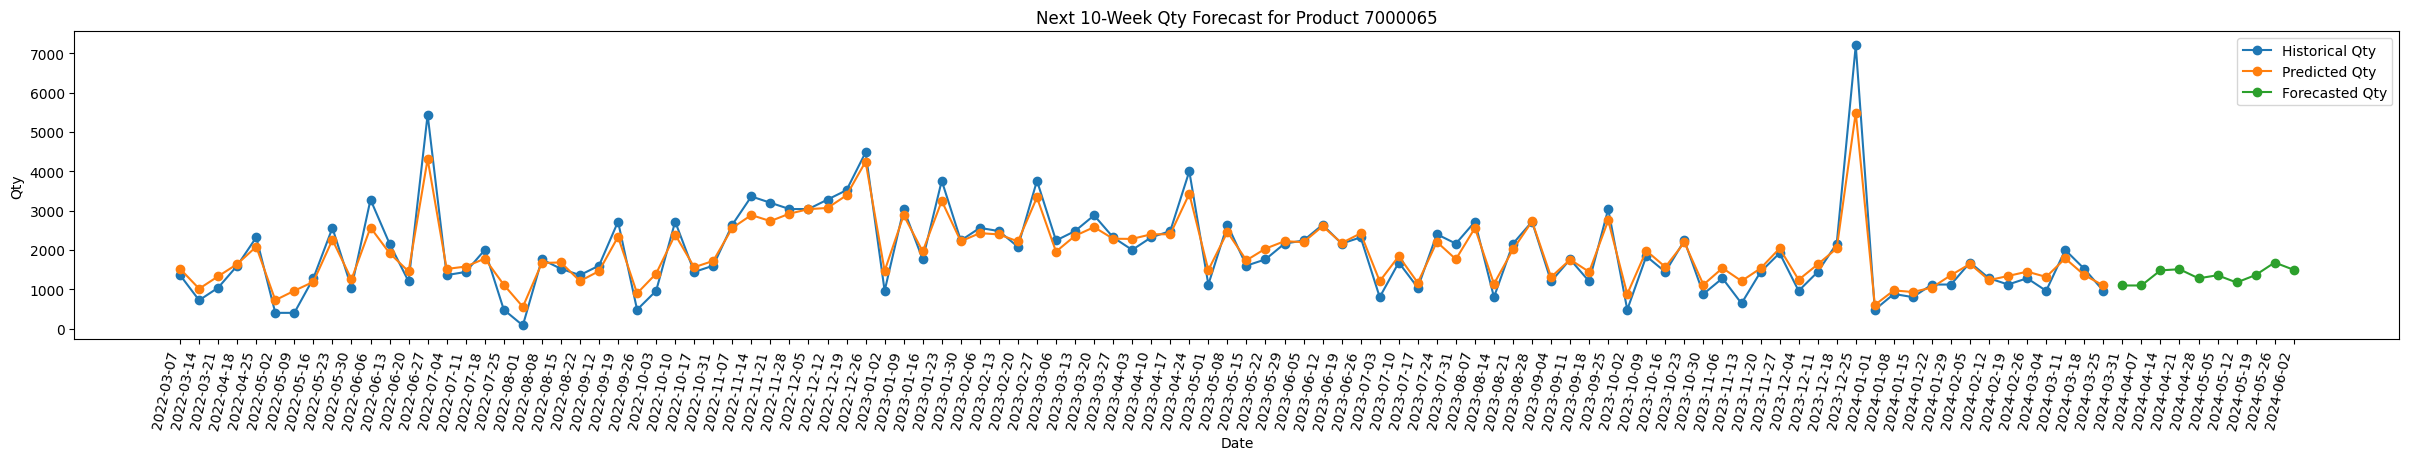

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31      844.858914
1 2024-04-07      752.696719
2 2024-04-14     1178.190643
3 2024-04-21      977.375327
4 2024-04-28      922.932315
5 2024-05-05     1120.154856
6 2024-05-12      803.782541
7 2024-05-19     1418.088348
8 2024-05-26      936.698897
9 2024-06-02      845.786801


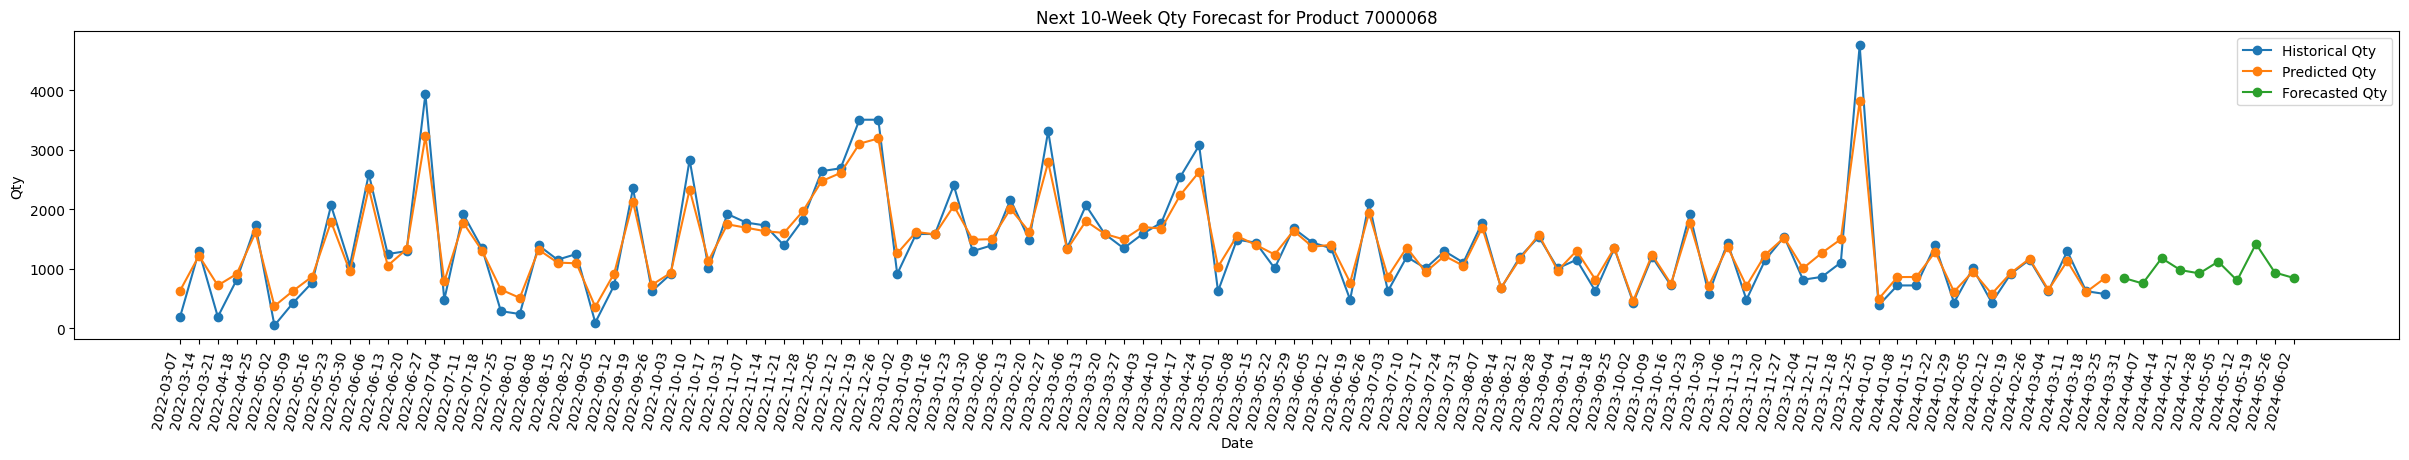

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     1456.633200
1 2024-04-07     1283.719733
2 2024-04-14     1282.608057
3 2024-04-21     1191.123701
4 2024-04-28     1261.430339
5 2024-05-05     1157.560249
6 2024-05-12      930.623142
7 2024-05-19     1218.742867
8 2024-05-26     1320.067059
9 2024-06-02     1166.263431


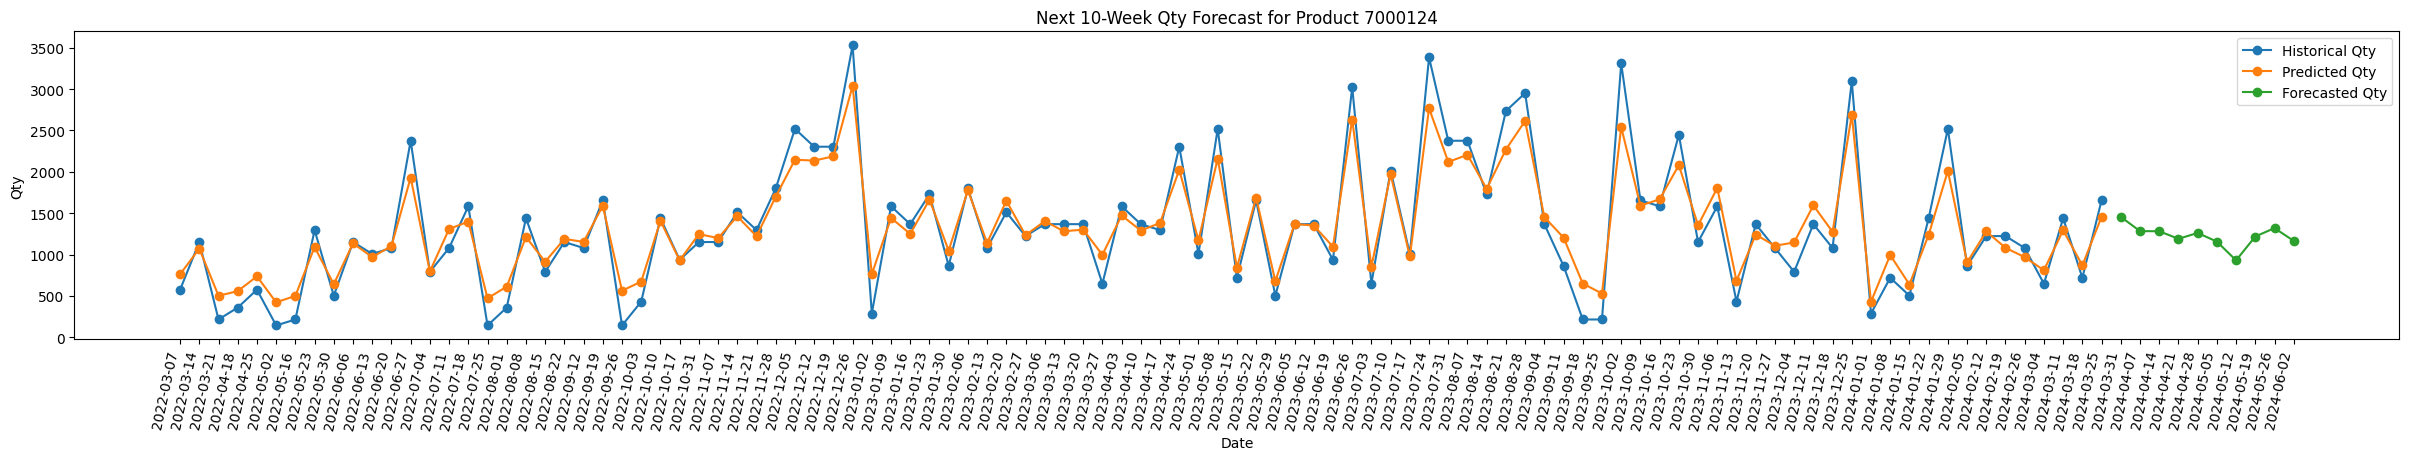

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     1309.412957
1 2024-04-07      643.779949
2 2024-04-14      670.271673
3 2024-04-21      796.856022
4 2024-04-28      548.096018
5 2024-05-05     1288.293378
6 2024-05-12     1000.761704
7 2024-05-19      720.767510
8 2024-05-26      948.522871
9 2024-06-02      771.402957


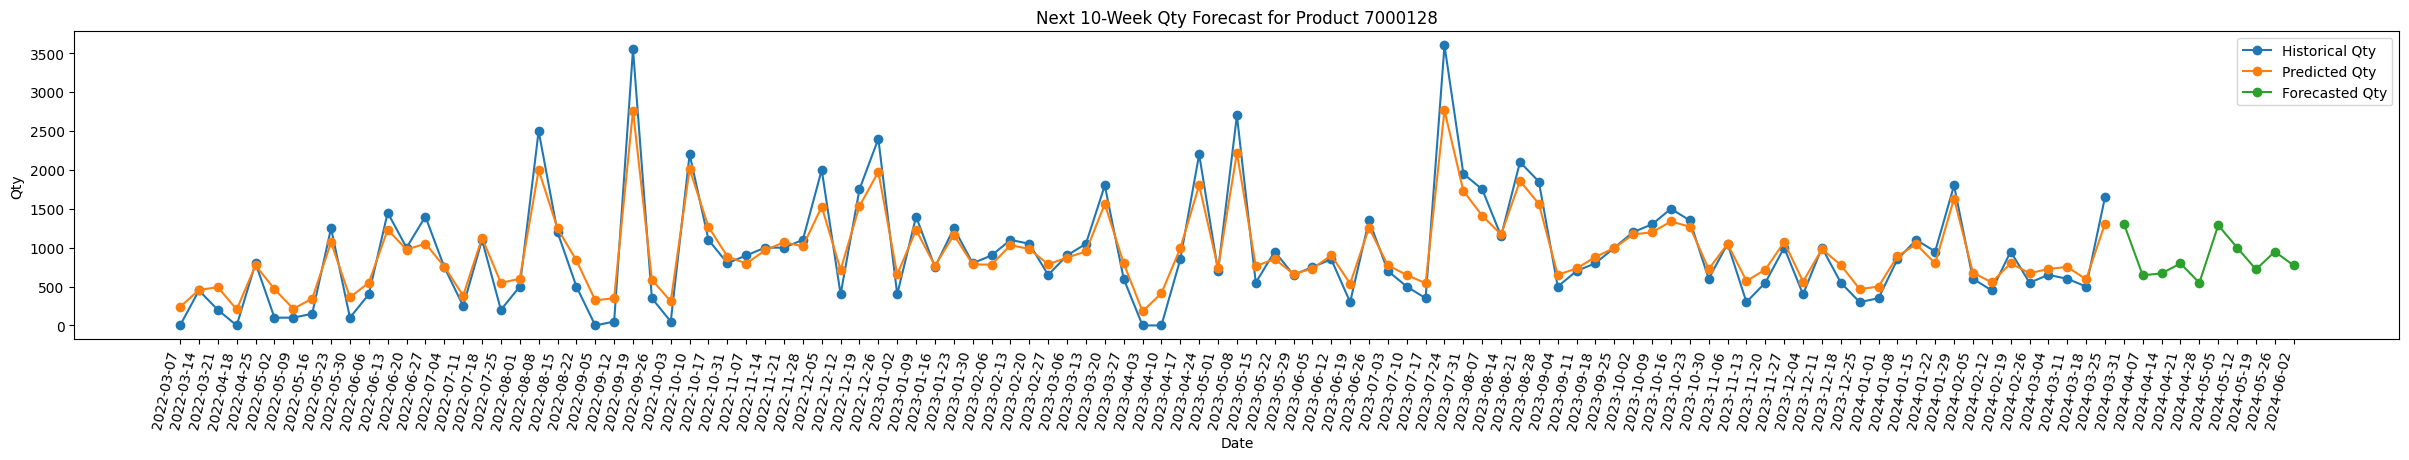

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     5600.301153
1 2024-04-07     4210.158795
2 2024-04-14     4642.434362
3 2024-04-21     3780.666762
4 2024-04-28     4396.736631
5 2024-05-05     3850.770857
6 2024-05-12     4770.687140
7 2024-05-19     3304.122617
8 2024-05-26     3453.316456
9 2024-06-02     3386.168231


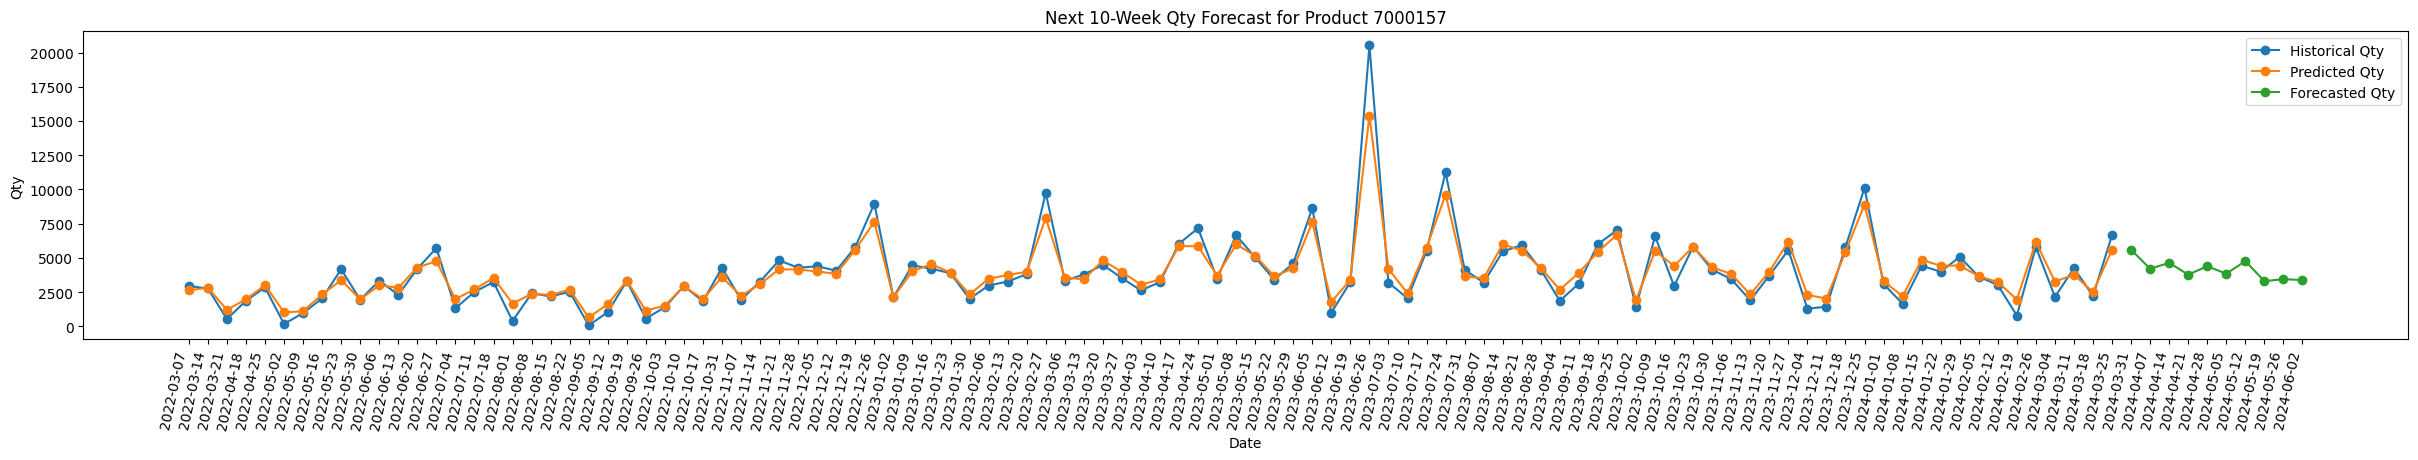

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     2041.382521
1 2024-04-07     2807.449388
2 2024-04-14      844.235535
3 2024-04-21     1731.467437
4 2024-04-28     2034.663985
5 2024-05-05     2857.899448
6 2024-05-12     1272.810803
7 2024-05-19     1482.289094
8 2024-05-26     1402.077710
9 2024-06-02     2671.870891


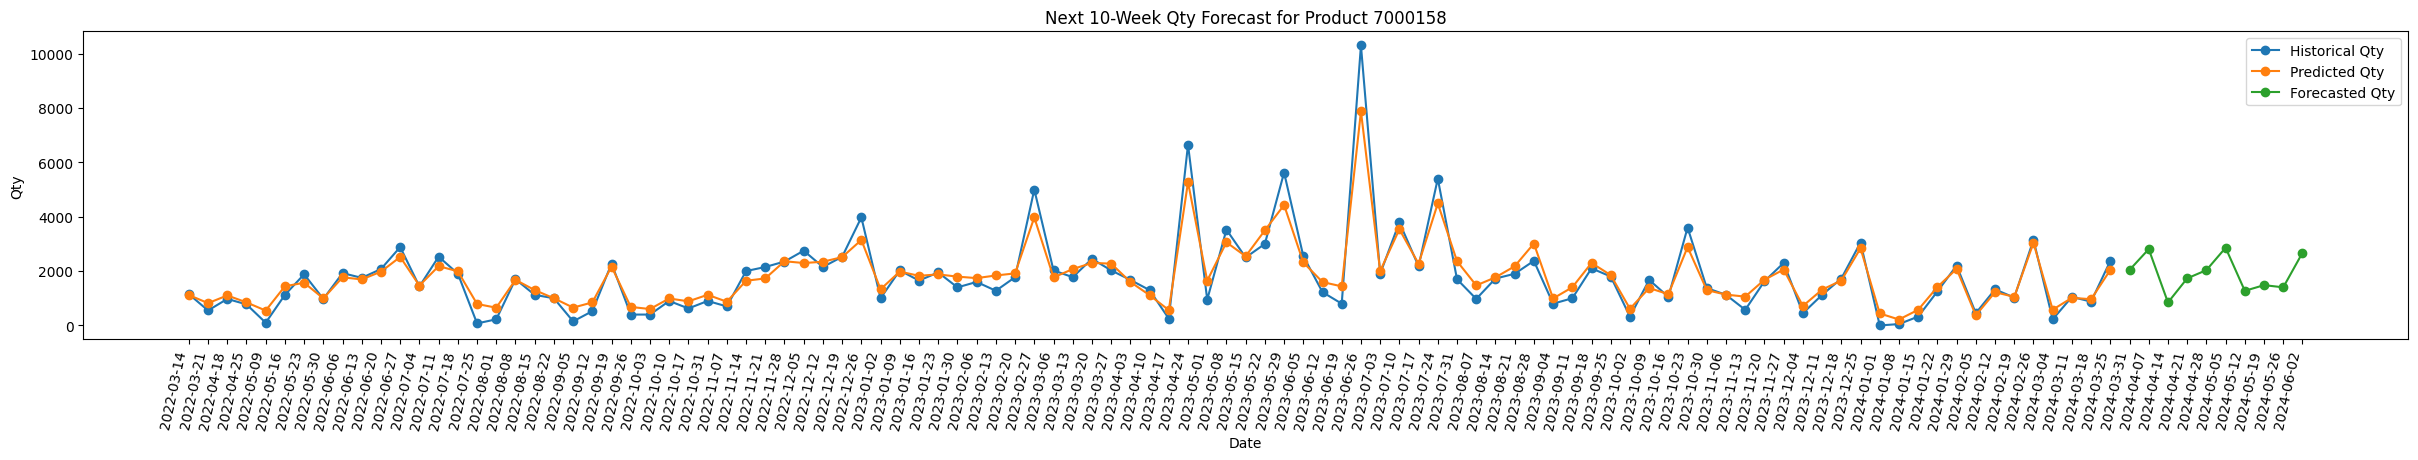

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     7684.921386
1 2024-04-07     2894.977353
2 2024-04-14     2950.682622
3 2024-04-21     3922.109983
4 2024-04-28     3394.099858
5 2024-05-05     6242.705978
6 2024-05-12     2694.114973
7 2024-05-19     3554.630362
8 2024-05-26     4236.589654
9 2024-06-02     5329.088189


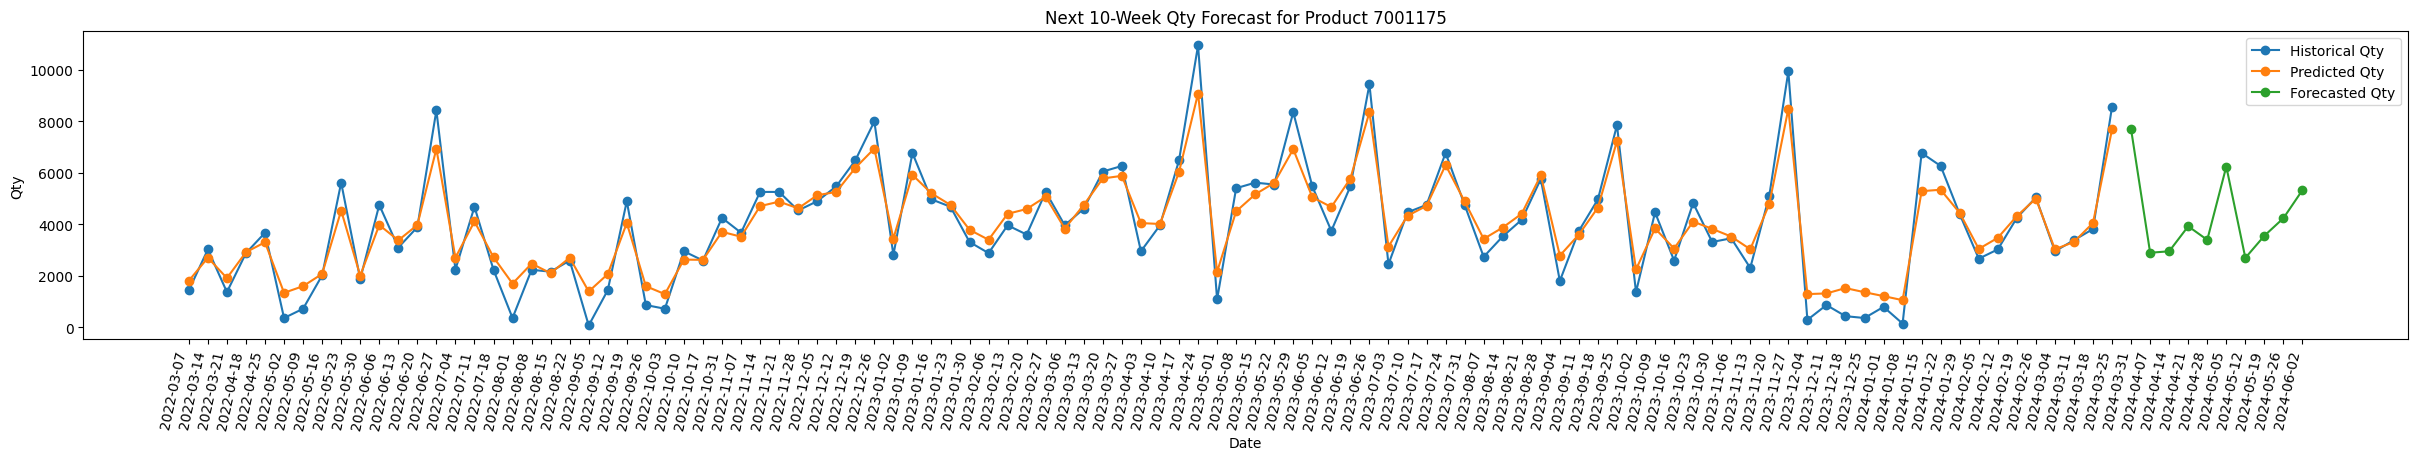

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31    10515.209484
1 2024-04-07     4924.026414
2 2024-04-14     5612.215933
3 2024-04-21     5697.745545
4 2024-04-28     7016.190980
5 2024-05-05    10850.652599
6 2024-05-12     6963.011097
7 2024-05-19     5952.997472
8 2024-05-26     6901.096694
9 2024-06-02     7986.966672


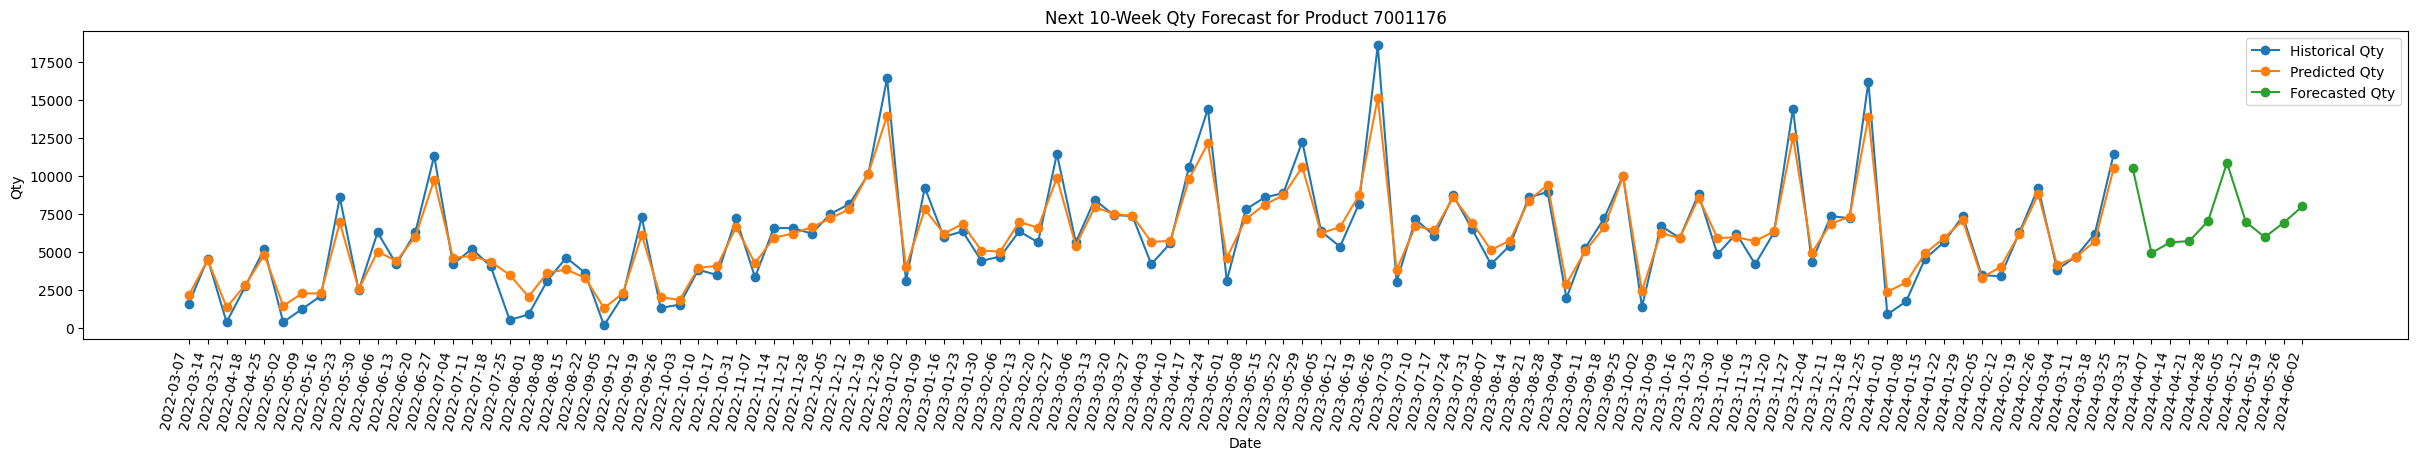

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     7233.204675
1 2024-04-07     4945.171065
2 2024-04-14     2971.569463
3 2024-04-21     3459.999562
4 2024-04-28     5323.029597
5 2024-05-05     5614.245539
6 2024-05-12     4457.794907
7 2024-05-19     3485.133015
8 2024-05-26     3566.289062
9 2024-06-02     5272.169658


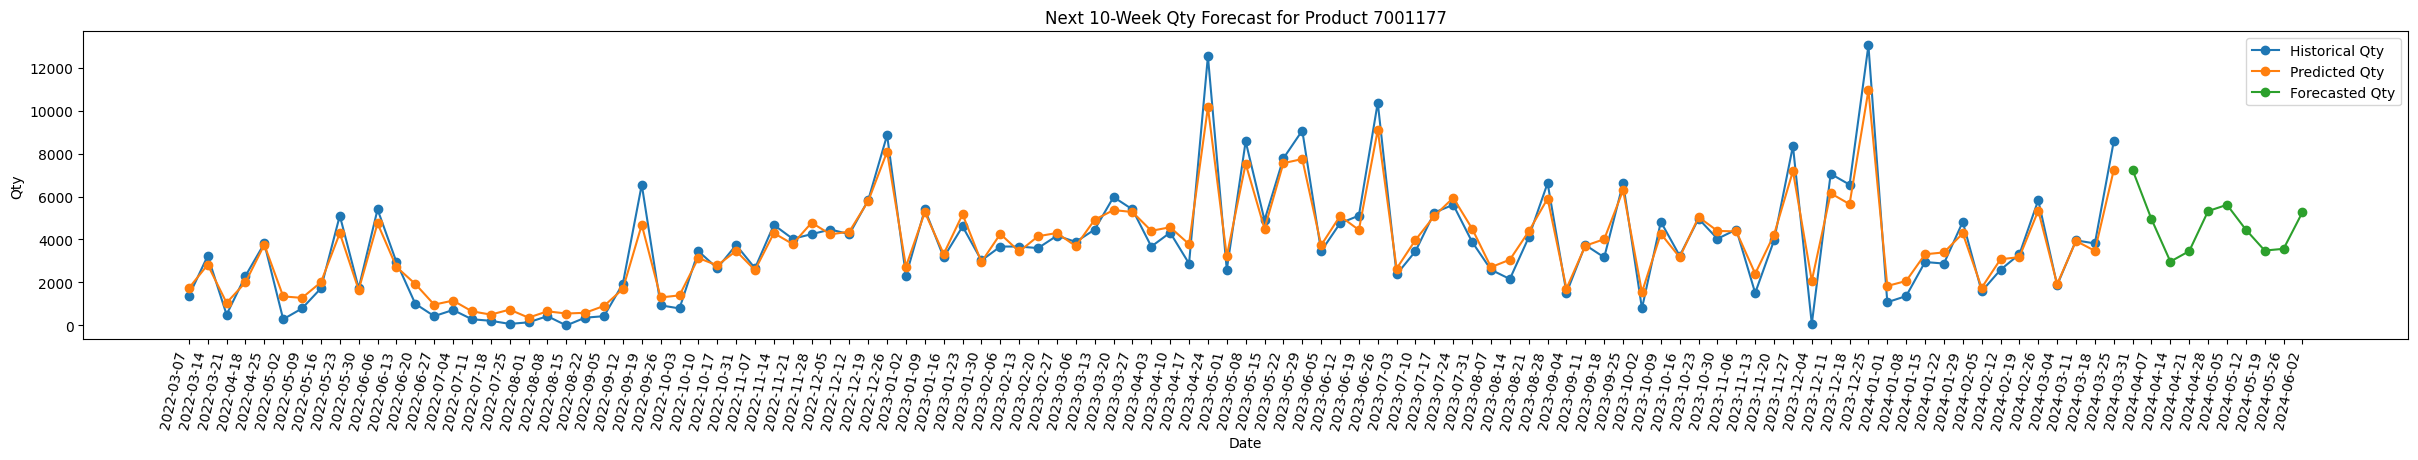

last_date_time  2024-03-25 00:00:00
        week  forecasted_Qty
0 2024-03-31     4405.523540
1 2024-04-07     2057.846544
2 2024-04-14     2278.186295
3 2024-04-21     2671.838830
4 2024-04-28     3214.874952
5 2024-05-05     4138.175657
6 2024-05-12     2569.950436
7 2024-05-19     3605.043055
8 2024-05-26     3439.366701
9 2024-06-02     3446.718373


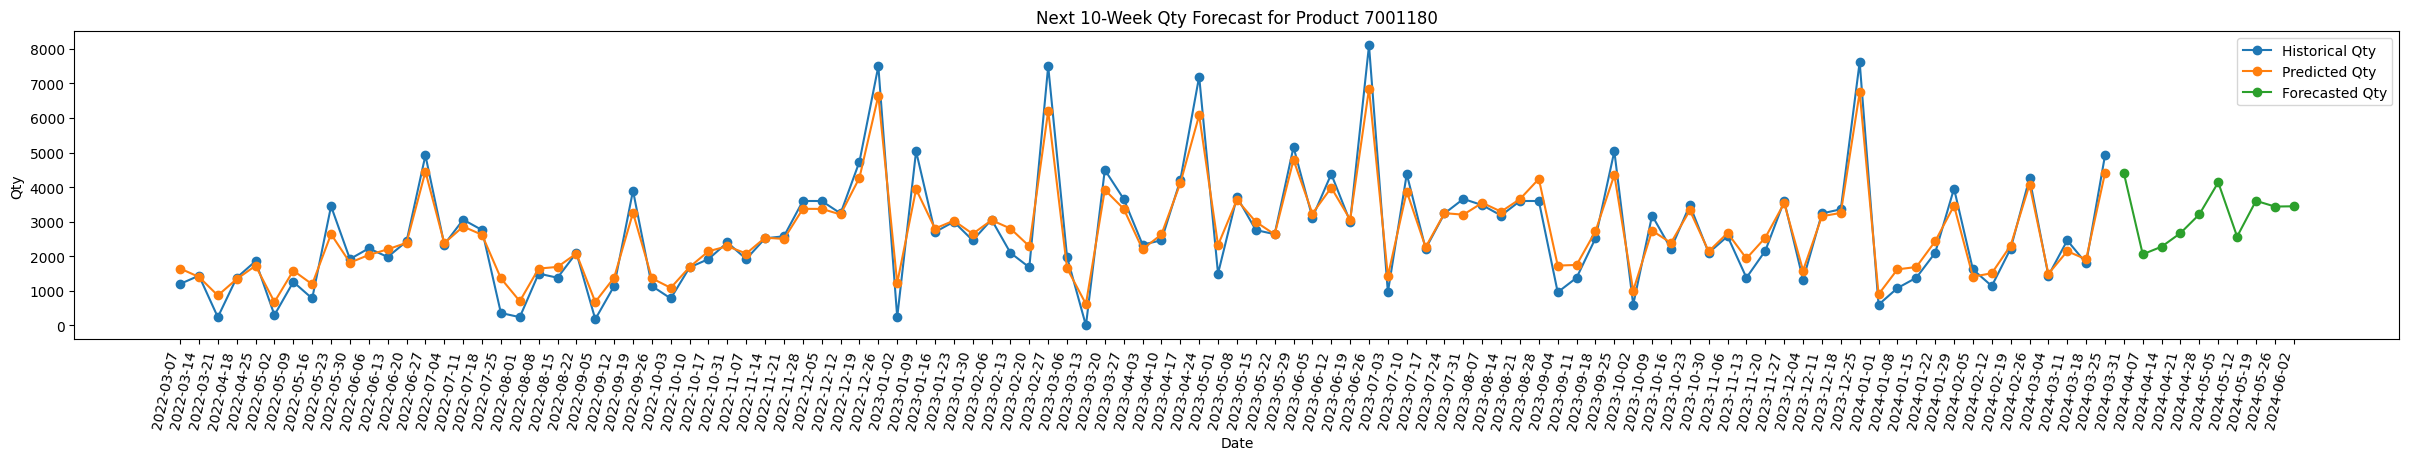

In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

products = data[(data['CFACode'] == 7001)]['ProductCode'].unique()[:20]

def create_features(df, max_lags=10):
    for lag in range(1, max_lags + 1):
        df[f'lag_{lag}'] = df.groupby(['ProductCode', 'CFACode'])['Qty'].shift(lag)
    
    df['rolling_mean_4'] = df.groupby(['ProductCode', 'CFACode'])['Qty'].shift(1).rolling(window=4).mean()
    df['rolling_std_4'] = df.groupby(['ProductCode', 'CFACode'])['Qty'].shift(1).rolling(window=4).std()
    
    df['week_num'] = df.index.isocalendar().week
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    return df.dropna()

def forecast_next_n_weeks(last_known_data, n_weeks=10):
    future_predictions = []
    last_date_time = last_known_data.index[-1]
    print('last_date_time ', last_date_time)
    
    last_date = last_known_data.index[-1]
    
    for i in range(n_weeks):
        last_known_data = create_features(last_known_data)  
        
        if last_known_data.empty:
            print(f"No data available to make predictions for week {i + 1}. Stopping forecast.")
            break
        
        X_last = last_known_data.iloc[-1:, :].drop(columns=['Qty'])
        if X_last.empty:
            print(f"No features available for prediction at week {i + 1}. Stopping forecast.")
            break
        
        rf_pred = rf.predict(X_last)[0]
        xgb_pred = xgb.predict(X_last)[0]
        lgbm_pred = lgbm.predict(X_last)[0]
        
        ensemble_pred = (rf_pred + xgb_pred + lgbm_pred) / 3
        future_predictions.append(ensemble_pred)
        
        next_date = last_date + pd.DateOffset(weeks=1)

        new_row = pd.DataFrame({
            'ProductCode': last_known_data['ProductCode'].iloc[-1],
            'CFACode': last_known_data['CFACode'].iloc[-1],
            'Qty': ensemble_pred,
            'week_num': next_date.isocalendar()[1],
            'month': next_date.month,
            'year': next_date.year,
        }, index=[next_date])
        
        for lag in range(1, 11):
            new_row[f'lag_{lag}'] = last_known_data[f'lag_{lag}'].iloc[-1] if lag <= len(last_known_data) else np.nan
            
        new_row['rolling_mean_4'] = last_known_data['Qty'].iloc[-4:].mean() if len(last_known_data) >= 4 else np.nan
        new_row['rolling_std_4'] = last_known_data['Qty'].iloc[-4:].std() if len(last_known_data) >= 4 else np.nan
        # print("last_known_data['Qty'].iloc[-4:].std()", last_known_data['Qty'].iloc[-4:].std())
        
        last_known_data = pd.concat([last_known_data, new_row], ignore_index=False)
        last_date = next_date  

    return future_predictions, pd.date_range(start=last_date_time , periods=len(future_predictions), freq='W')

for i in products:
    df = data[(data['CFACode'] == 7004) & (data['ProductCode'] == i)].copy()
    df.rename(columns={'week_start_date': 'week'}, inplace=True)
    df['week'] = pd.to_datetime(df['week'])
    df = df.sort_values(by=['week'])
    df.reset_index(drop=True, inplace=True)
    df.set_index('week', inplace=True)
    df.drop(['MRP', 'RATE'], axis=1, inplace=True)
    
    df = create_features(df)
    
    X = df.drop(columns=['Qty'])
    y = df['Qty']

    rf = RandomForestRegressor(n_estimators=85, random_state=42)
    xgb = XGBRegressor(n_estimators=120, random_state=42)
    lgbm = LGBMRegressor(n_estimators=80, random_state=42, verbosity=-1)

    rf.fit(X, y)
    xgb.fit(X, y)
    lgbm.fit(X, y)

    rf_pred = rf.predict(X)
    xgb_pred = xgb.predict(X)
    lgbm_pred = lgbm.predict(X)
    ensemble_pred = (rf_pred + xgb_pred + lgbm_pred) / 3

    last_known_data = df.copy()
    predictions, forecast_dates = forecast_next_n_weeks(last_known_data, n_weeks=10)

    if predictions:
        forecast_df = pd.DataFrame({
            'week': forecast_dates[:len(predictions)],
            'forecasted_Qty': predictions
        })
    else:
        forecast_df = pd.DataFrame(columns=['week', 'forecasted_Qty'])

    print(forecast_df)

    plt.figure(figsize=(30, 4))
    plt.plot([str(i).split(' ')[0] for i in df.index], df['Qty'], label='Historical Qty', marker='o')
    plt.plot([str(i).split(' ')[0] for i in X.index], ensemble_pred, marker='o', label='Predicted Qty')
    
    if not forecast_df.empty:
        plt.plot([str(i).split(' ')[0] for i in  forecast_df['week']], forecast_df['forecasted_Qty'], label='Forecasted Qty', marker='o')
    plt.title(f"Next 10-Week Qty Forecast for Product {i}")
    plt.xlabel("Date")
    plt.ylabel("Qty")
    plt.xticks(rotation=78, ha='right')
    plt.legend()
    plt.show()


In [27]:
X.head()

CFACode  ProductCode  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  \
week                                                                         
2022-03-21     7004      7000615    0.0    0.0    0.0    0.0  144.0   48.0   
2022-04-18     7004      7000615    0.0    0.0    0.0    0.0    0.0  144.0   
2022-04-25     7004      7000615    0.0    0.0    0.0    0.0    0.0    0.0   
2022-05-09     7004      7000615    0.0    0.0    0.0    0.0    0.0    0.0   
2022-05-16     7004      7000615    0.0    0.0    0.0    0.0    0.0    0.0   

            lag_7  lag_8  lag_9  lag_10  rolling_mean_4  rolling_std_4  \
week                                                                     
2022-03-21  240.0   96.0  288.0    48.0             0.0            0.0   
2022-04-18   48.0  240.0   96.0   288.0             0.0            0.0   
2022-04-25  144.0   48.0  240.0    96.0             0.0            0.0   
2022-05-09    0.0  144.0   48.0   240.0             0.0            0.0   
2022-05-16    0.0    0.0  144.0    48.0             0.0            0.0   

            week_num  month  year  
week                               
2022-03-21        12      3  2022  
2022-04-18        16      4  2022  
2022-04-25        17      4  2022  
2022-05-09        19      5  2022  
2022-05-16        20      5  2022

In [28]:
df.head()

CFACode  ProductCode    Qty  lag_1  lag_2  lag_3  lag_4  lag_5  \
week                                                                         
2022-03-21     7004      7000615    0.0    0.0    0.0    0.0    0.0  144.0   
2022-04-18     7004      7000615    0.0    0.0    0.0    0.0    0.0    0.0   
2022-04-25     7004      7000615    0.0    0.0    0.0    0.0    0.0    0.0   
2022-05-09     7004      7000615    0.0    0.0    0.0    0.0    0.0    0.0   
2022-05-16     7004      7000615  192.0    0.0    0.0    0.0    0.0    0.0   

            lag_6  lag_7  lag_8  lag_9  lag_10  rolling_mean_4  rolling_std_4  \
week                                                                            
2022-03-21   48.0  240.0   96.0  288.0    48.0             0.0            0.0   
2022-04-18  144.0   48.0  240.0   96.0   288.0             0.0            0.0   
2022-04-25    0.0  144.0   48.0  240.0    96.0             0.0            0.0   
2022-05-09    0.0    0.0  144.0   48.0   240.0             0.0            0.0   
2022-05-16    0.0    0.0    0.0  144.0    48.0             0.0            0.0   

            week_num  month  year  
week                               
2022-03-21        12      3  2022  
2022-04-18        16      4  2022  
2022-04-25        17      4  2022  
2022-05-09        19      5  2022  
2022-05-16        20      5  2022

In [33]:
# data[(data['CFACode'] == 7004) & (data['ProductCode'] == i)].reset_index(drop=True).head(10)

In [32]:
last_known_data['Qty'].iloc[-4:].mean()

168.0

In [31]:
last_known_data

CFACode  ProductCode    Qty  lag_1  lag_2  lag_3  lag_4  lag_5  \
week                                                                         
2022-03-21     7004      7000615    0.0    NaN    NaN    NaN    NaN    NaN   
2022-04-18     7004      7000615    0.0    0.0    NaN    NaN    NaN    NaN   
2022-04-25     7004      7000615    0.0    0.0    0.0    NaN    NaN    NaN   
2022-05-09     7004      7000615    0.0    0.0    0.0    0.0    NaN    NaN   
2022-05-16     7004      7000615  192.0    0.0    0.0    0.0    0.0    NaN   
...             ...          ...    ...    ...    ...    ...    ...    ...   
2024-02-26     7004      7000615   96.0  144.0  528.0   96.0  864.0   48.0   
2024-03-04     7004      7000615  240.0   96.0  144.0  528.0   96.0  864.0   
2024-03-11     7004      7000615  288.0  240.0   96.0  144.0  528.0   96.0   
2024-03-18     7004      7000615   48.0  288.0  240.0   96.0  144.0  528.0   
2024-03-25     7004      7000615   96.0   48.0  288.0  240.0   96.0  144.0   

            lag_6  lag_7  lag_8  lag_9  lag_10  rolling_mean_4  rolling_std_4  \
week                                                                            
2022-03-21    NaN    NaN    NaN    NaN     NaN             NaN            NaN   
2022-04-18    NaN    NaN    NaN    NaN     NaN             NaN            NaN   
2022-04-25    NaN    NaN    NaN    NaN     NaN             NaN            NaN   
2022-05-09    NaN    NaN    NaN    NaN     NaN             NaN            NaN   
2022-05-16    NaN    NaN    NaN    NaN     NaN             0.0       0.000000   
...           ...    ...    ...    ...     ...             ...            ...   
2024-02-26   96.0   96.0   96.0   48.0    96.0           408.0     360.266568   
2024-03-04   48.0   96.0   96.0   96.0    48.0           216.0     209.227149   
2024-03-11  864.0   48.0   96.0   96.0    96.0           252.0     193.494186   
2024-03-18   96.0  864.0   48.0   96.0    96.0           192.0      87.635609   
2024-03-25  528.0   96.0  864.0   48.0    96.0           168.0     114.262855   

            week_num  month  year  
week                               
2022-03-21        12      3  2022  
2022-04-18        16      4  2022  
2022-04-25        17      4  2022  
2022-05-09        19      5  2022  
2022-05-16        20      5  2022  
...              ...    ...   ...  
2024-02-26         9      2  2024  
2024-03-04        10      3  2024  
2024-03-11        11      3  2024  
2024-03-18        12      3  2024  
2024-03-25        13      3  2024  

[79 rows x 18 columns]

In [34]:
rf_pred = rf.predict(X)
xgb_pred = xgb.predict(X)
lgbm_pred = lgbm.predict(X)
ensemble_pred = (rf_pred + xgb_pred + lgbm_pred) / 3